In [1]:
from src import Processor, Reader
import pandas as pd
from datetime import datetime
from sklearn import metrics, model_selection, preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import numpy as np

# Plotting
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()

In [2]:
# Using the US Census regions from here: https://www2.census.gov/geo/pdfs/maps-data/maps/reference/us_regdiv.pdf
south_atlantic_states = [
    10   # Delaware
    , 11 # DC
    , 12 # Florida
    , 13 # Georgia
    , 24 # Maryland
    , 37 # North Carolina
    , 45 # South Carolina
    , 51 # Virginia
    , 54 # West Virginia
]
state_filter = [51] # ONLY INCLUDES VA

In [3]:
state_dict = {
    'code' : ['10', '11', '12', '13', '24', '37', '45', '51', '54']
    , 'state_name' : ['Delware', 'DC', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia', 'West Virginia']
}

state_code_map = pd.DataFrame(data=state_dict)

In [4]:
state_code_map.head()

,code,state_name
0,10,Delware
1,11,DC
2,12,Florida
3,13,Georgia
4,24,Maryland


## Loading data

In [5]:
# Instantiate preprocessor
preprocessor = Processor.PreProcessor(state_filter=state_filter)

In [6]:
preprocessor.load_processed_data()

/Users/elizabethmartens/cs5644/project/projectGitRepo/src/Processor.py:36: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  merged_df = self.init_cdc_data().merge(self.init_vaccinations_data(), how='left', on=['date', 'FIPS'])
/Users/elizabethmartens/cs5644/project/projectGitRepo/src/Processor.py:36: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  merged_df = self.init_cdc_data().merge(self.init_vaccinations_data(), how='left', on=['date', 'FIPS'])


In [7]:
# Put data into a df to work with
df = preprocessor.get_current_data()

In [8]:
df.head()

,FIPS_51001,FIPS_51003,FIPS_51005,FIPS_51007,FIPS_51009,FIPS_51011,FIPS_51013,FIPS_51015,FIPS_51017,FIPS_51019,...,restuarants_limited_open_outdoor_only_nan,restuarants_limited_open_general_indoor_Yes,restuarants_limited_open_general_indoor_nan,Series_Complete_Pop_Pct,Administered_Dose1_Pop_Pct,is_metro,Series_Complete_Pop_Pct_UR_Equity,cases,deaths,days_from_start
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1024.0,14.0,71
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1031.0,14.0,72
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1032.0,14.0,73
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1033.0,14.0,74
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1034.0,14.0,75


In [9]:
df.shape

(65569, 213)

In [10]:
# Export data to csv so that the data does not have to be recreated each run
#df.to_csv('COVID_Analysis_Data.csv',index=False)

In [11]:
data = df
#data = pd.read_csv("COVID_Analysis_Data.csv")

In [12]:
# Looking at cases and death values
#c_d_value = data[['cases','deaths']]

In [13]:
#c_d_value

In [14]:
#c_d_value.to_csv('cases_deaths_null_check.csv', index=False)

In [15]:
null_mask = data['cases'].isnull()
null_eval = data.loc[null_mask]
null_eval

,FIPS_51001,FIPS_51003,FIPS_51005,FIPS_51007,FIPS_51009,FIPS_51011,FIPS_51013,FIPS_51015,FIPS_51017,FIPS_51019,...,restuarants_limited_open_outdoor_only_nan,restuarants_limited_open_general_indoor_Yes,restuarants_limited_open_general_indoor_nan,Series_Complete_Pop_Pct,Administered_Dose1_Pop_Pct,is_metro,Series_Complete_Pop_Pct_UR_Equity,cases,deaths,days_from_start


In [16]:
# Converting date column for filtering
#data['date'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d'))

# Filtering data by date for training dataset
end_date_train = '2021-06-14'
train_mask = (data['date'] <= end_date_train)

# Training dataset with date (wd)
data_train_wd = data.loc[train_mask]

# Creating training dataset and removing date
data_train = data_train_wd.drop(columns=['date'])

In [17]:
# Filtering data by date for test dataset
start_date_test = '2021-06-15'
test_mask = (data['date'] >= start_date_test)

# Test dataset with date (wd)
data_test_wd = data.loc[test_mask]

# Creating training dataset and removing date
data_test = data_test_wd.drop(columns=['date'])

In [18]:
# Separating out columns to exclude response variables for training and testing
data_train_cols = [c for c in data_train.columns if c not in ['cases','deaths']]
data_test_cols = [c for c in data_test.columns if c not in ['cases','deaths']]

In [19]:
# Creating training predictors and response variables
X_train = data_train[data_train_cols]
y_train_cases = data_train['cases']
y_train_deaths = data_train['deaths']

# Creating testing predictors and response variables
X_test = data_test[data_test_cols]
y_test_cases = data_test['cases']
y_test_deaths = data_test['deaths']

In [20]:
# Evaluating training data
data_train.head()

,FIPS_51001,FIPS_51003,FIPS_51005,FIPS_51007,FIPS_51009,FIPS_51011,FIPS_51013,FIPS_51015,FIPS_51017,FIPS_51019,...,restuarants_limited_open_outdoor_only_nan,restuarants_limited_open_general_indoor_Yes,restuarants_limited_open_general_indoor_nan,Series_Complete_Pop_Pct,Administered_Dose1_Pop_Pct,is_metro,Series_Complete_Pop_Pct_UR_Equity,cases,deaths,days_from_start
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1024.0,14.0,71
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1031.0,14.0,72
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1032.0,14.0,73
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1033.0,14.0,74
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1034.0,14.0,75


In [21]:
# Evaluating the size of the training and test datasets
print(data_train.shape)
print(data_test.shape)

(57323, 212)
(8246, 212)


In [22]:
# Testing on cases

model = LinearRegression()

scores = model_selection.cross_validate(model, X_train, y_train_cases, cv=5, scoring='neg_root_mean_squared_error')
    
## Training model on entire training dataset
model.fit(X_train, y_train_cases)

y_preds = model.predict(X_test)

print()
# The mean square error
rmse = np.sqrt(np.mean((y_preds - y_test_cases) ** 2))
print(rmse)


4693.971596968773


In [25]:
scores

{'fit_time': array([0.84074974, 0.77606511, 0.76430106, 0.80240011, 0.73337317]),
 'score_time': array([0.06359291, 0.06812596, 0.06673884, 0.06477404, 0.0652492 ]),
 'test_score': array([-7682.09172255, -4772.27736251, -3513.53606026, -6620.30508746,
        -4692.48200666])}

In [26]:
residuals = y_preds - y_test_cases

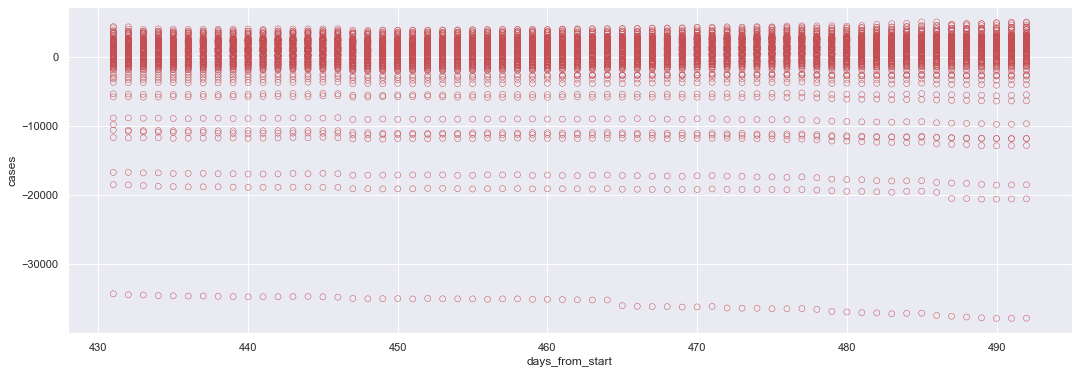

In [27]:
plt.figure(figsize=(18, 6))
sns.scatterplot(x=X_test['days_from_start'], y=residuals, color='none', edgecolor='r')
plt.show()
# TODO what happens if we remove these outliers?
# Does the model fit improve significantly?

In [29]:
# Test out combining all of the data for a single state and seeing how far off cases/deaths predictions were?


# Decision Tree

In [30]:
# Testing on cases

model_dt = DecisionTreeRegressor()

scores_dt = model_selection.cross_validate(model_dt, X_train, y_train_cases, cv=5, scoring='neg_root_mean_squared_error')
    
## Training model on entire training dataset
model_dt.fit(X_train, y_train_cases)

y_preds_dt = model_dt.predict(X_test)

print()
# The mean square error
rmse_dt = np.sqrt(np.mean((y_preds_dt - y_test_cases) ** 2))



## KNN Regressor

In [31]:
# Testing on cases

model_knn = KNeighborsRegressor()

scores_knn = model_selection.cross_validate(model_knn, X_train, y_train_cases, cv=5, scoring='neg_root_mean_squared_error')
    
## Training model on entire training dataset
model_knn.fit(X_train, y_train_cases)

y_preds_knn = model_knn.predict(X_test)

print()
# The mean square error
rmse_knn= np.sqrt(np.mean((y_preds_knn - y_test_cases) ** 2))



In [32]:
print('Decision tree RMSE:', rmse_dt)
print('Linear Regression RMSE:', rmse)
print('KNN Regression RMSE:', rmse_knn)

Decision tree RMSE: 284.0394291001364
Linear Regression RMSE: 4693.971596968773
KNN Regression RMSE: 7863.548388045464


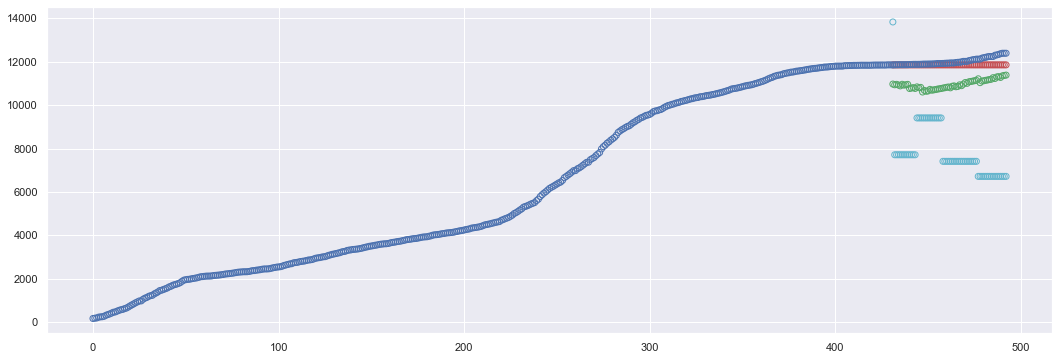

In [34]:
# Checking out how the prediction looked vs the model (Alexandria, VA FIPS 51510)
county_mask = X_test['FIPS_51510'] == 1
county_mask_train = X_train['FIPS_51510'] == 1
plt.figure(figsize=(18, 6))
plt.scatter(x=X_test[county_mask]['days_from_start'], y=y_preds_dt[county_mask], color='none', edgecolor='r')
plt.scatter(x=X_test[county_mask]['days_from_start'], y=y_preds[county_mask], color='none', edgecolor='g')
plt.scatter(x=X_test[county_mask]['days_from_start'], y=y_preds_knn[county_mask], color='none', edgecolor='c')
plt.scatter(x=X_train[county_mask_train]['days_from_start'], y=y_train_cases[county_mask_train], color='none', edgecolor='b')
plt.scatter(x=X_test[county_mask]['days_from_start'], y=y_test_cases[county_mask], color='none', edgecolor='b');

In [ ]:
y_train_cases[county_mask_train].values[-1]

In [ ]:
y_preds_dt[county_mask]